In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from utils import plot_data, plot_decision_boundary, sigmoid, map_feature, train, predict, cost_function, gradient
plt.style.use("ggplot")

In [3]:
data = pd.read_csv('data/ex2data1.txt', delimiter=',', header=None, names=['exam 1', 'exam 2', 'Admitted'])

In [4]:
data.head()

,exam 1,exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.tail()

,exam 1,exam 2,Admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [6]:
n_row, n_col = data.shape

# convert data to numpy array

In [7]:
data = data.values
X, y = data[:, 0:n_col-1], data[:,-1].reshape(n_row, 1)

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [8]:
"""
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2].reshape(X.shape[0], 1)
print(X.shape)
print(y.shape)
print(y.flatten().shape)
"""

"\ndata = np.loadtxt('ex2data1.txt', delimiter=',')\nX = data[:, 0:2]\ny = data[:, 2].reshape(X.shape[0], 1)\nprint(X.shape)\nprint(y.shape)\nprint(y.flatten().shape)\n"

In [9]:
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples")

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples


Text(0.5, 1.0, 'Scores of two exams')

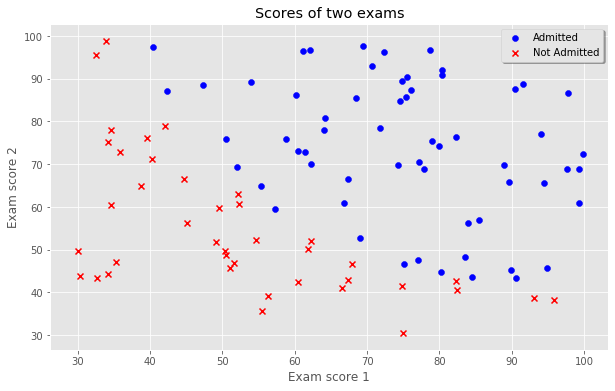

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
plot_data(features=X, labels=y, ax=ax, label=['Admitted', 'Not Admitted'], legend=True)
ax.set_xlabel('Exam score 1')
ax.set_ylabel('Exam score 2')
ax.set_title('Scores of two exams')

# Visualize using pylab

In [11]:
import pylab
from pylab import scatter, show, legend, xlabel, ylabel

def plot_data_pylab(X, y):
    y = y.flatten()
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    
    scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
    scatter(X[neg, 0], X[neg, 1], marker='x', c='r')

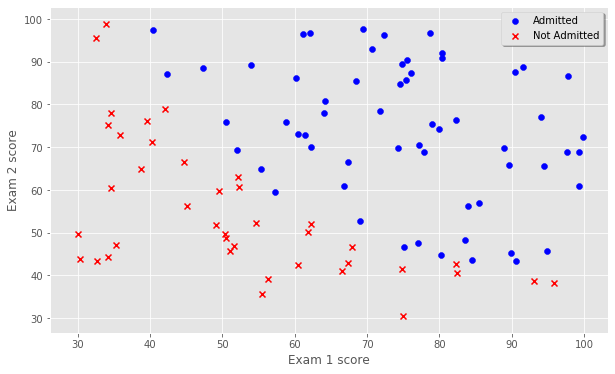

In [12]:
pylab.figure(figsize=(10,6))
"""
pos = where(y_p == 1)
neg = where(y_p == 0)

scatter(X_p[pos, 0], X_p[pos, 1], marker='o', c='b')
scatter(X_p[neg, 0], X_p[neg, 1], marker='x', c='r')
"""
plot_data_pylab(X, y)
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Admitted', 'Not Admitted'], loc=0, frameon=True, shadow=True)
show()

# Add a column of ones to x

In [13]:
X = np.insert(X, 0, 1, axis=1)

# Initialize fitting parameters

In [14]:
n = X.shape[1]
initial_theta = np.zeros(n)
initial_theta.shape

(3,)

# Compute and display initial cost and gradient

In [15]:
costs = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print(f'Cost at initial theta (zeros): {costs:.3f}')
print('Expected cost (approx): 0.693')
print(f'Gradient at initial theta (zeros):')
for value in grad:
    print(f' {value[0]:.4f}')
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
 -0.1000
 -12.0092
 -11.2628
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



# Compute and display cost and gradient with non-zero theta

In [16]:
test_theta = np.array([-24, 0.2, 0.2])
test_theta.shape

(3,)

In [17]:
cost = cost_function(test_theta, X, y)
grad = gradient(test_theta, X, y)
print(f'Cost at test theta (zeros): {cost}')
print('Expected cost (approx): 0.218')
print(f'Gradient at test theta (zeros):')
for value in grad:
    print(f' {value[0]:.3f}')
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta (zeros): 0.21833019382659785
Expected cost (approx): 0.218
Gradient at test theta (zeros):
 0.043
 2.566
 2.647
Expected gradients (approx):
 0.043
 2.566
 2.647



# Optimizing using scipy built-in function called minimize using TNC method

In [18]:
options = {'disp': False}
theta, cost = train(X, y, initial_theta, options)
print(theta)
print(cost)

[-25.16131865   0.20623159   0.20147149]
0.20349770158947444


In [19]:
# Print theta to screen
print(f'Cost at theta found by scipy minimize: {cost:.3f}')
print('Expected cost (approx): 0.203')
print('\ntheta:')
for value in theta:
    print(f' {value:.3f}')
print('\nExpected theta (approx):')
print(' -25.161\n 0.206\n 0.201\n')

Cost at theta found by scipy minimize: 0.203
Expected cost (approx): 0.203

theta:
 -25.161
 0.206
 0.201

Expected theta (approx):
 -25.161
 0.206
 0.201



# plot decision boundary

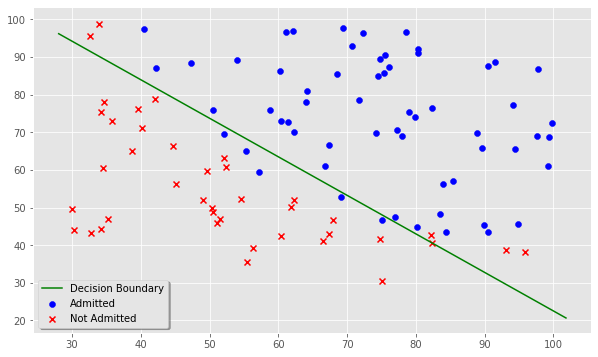

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
plot_decision_boundary(theta, X, y, ax, label=['Admitted', 'Not Admitted', 'Decision Boundary'])

## Predict probability for a student with score 45 on exam 1 and score 85 on exam 2

In [21]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta))

In [22]:
print(f'For a student with scores 45 and 85 we predict an admission probability of {prob}')

For a student with scores 45 and 85 we predict an admission probability of 0.7762906239171472


# Compute accuracy on training set

In [23]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    
    for i in range(m):
        if sigmoid(X[i, :].dot(theta)) >= 0.5:
            p[i] = 1
        if sigmoid(X[i, :].dot(theta)) < 0.5:
            p[i] = 0
    return p

In [24]:
p = predict(theta, X)

print(f'Train Accuracy: {np.mean(np.double(p == y)) * 100:.1f}')
print('Expected accuracy (approx): 89.0')

Train Accuracy: 89.0
Expected accuracy (approx): 89.0


# Logistic Regression with regularization

In [25]:
data = pd.read_csv('data/ex2data2.txt', delimiter=',', header=None, names=['Test1', 'Test2', 'Accepted/Rejected'])

In [26]:
data.head()

,Test1,Test2,Accepted/Rejected
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [27]:
data.tail()

,Test1,Test2,Accepted/Rejected
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [28]:
n_row, n_col = data.shape
data = data.values
X, y = data[:, 0:n_col-1], data[:,-1].reshape(n_row, 1)

print(X.shape)
print(y.shape)

(118, 2)
(118, 1)


Text(0.5, 1.0, 'Positive (y = 1) accepted, Negative (y = 0) rejected')

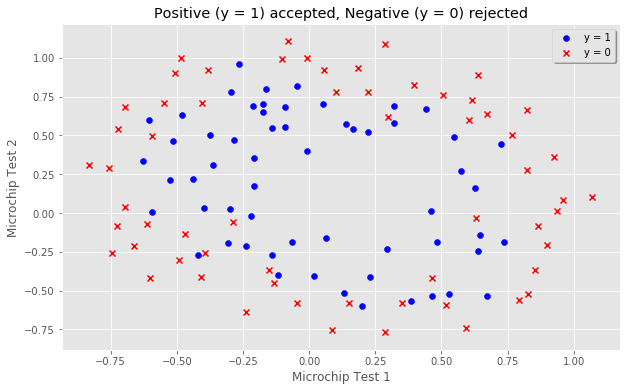

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plot_data(X, y, ax, label=['y = 1', 'y = 0'], legend=True)
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.set_title('Positive (y = 1) accepted, Negative (y = 0) rejected')

# Feature mapping

In [30]:
X = map_feature(X[:, 0], X[:, 1])

In [31]:
X.shape

(118, 28)

In [32]:
n = X.shape[1]
initial_theta = np.zeros(n) # .reshape(n,1)
initial_theta.shape

(28,)

In [33]:
lambd =1

In [34]:
cost = cost_function(initial_theta, X, y, lambd)
print(f'Cost at initial theta (zeros): {cost:.3f}')
print('Expected cost (approx): 0.693')

grad = gradient(initial_theta, X, y, lambd)
print('\nGradient at initial theta - first five values only')
for value in grad[0:5]:
    print(f' {value[0]:.4f}');
print('\nExpected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta - first five values only
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115

Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [35]:
test_theta = np.ones(n)

cost = cost_function(test_theta, X, y, 10)
print(f'Cost at test theta (with lambda = 10): {cost:.2f}')
print('Expected cost (approx): 3.16')

Cost at test theta (with lambda = 10): 3.16
Expected cost (approx): 3.16


In [36]:
grad = gradient(test_theta, X, y, 10)
print('Gradient at test theta - first five values only')
for value in grad[0:5]:
    print(f' {value[0]:.4f}');
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Gradient at test theta - first five values only
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



# NOT TO LARGE LAMBDA

In [37]:
lambd = 1
options = {'maxiter': 100, 'disp': True}
theta, cost  = train(X, y, initial_theta, options, lambd)

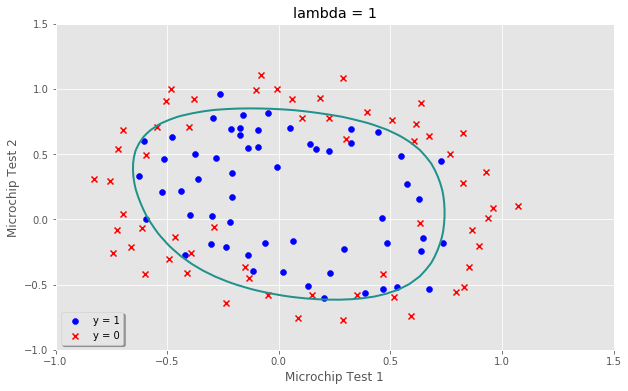

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
plot_decision_boundary(theta, X, y, ax, label=['y = 1', 'y = 0', 'Decision Boundary'])
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.set_title('lambda = ' + str(lambd))
ax.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc=3, frameon=True, shadow=True)

In [39]:
p = predict(theta, X)

print(f'Train Accuracy: {np.mean(np.double(p == y)) * 100:.1f}')
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 83.1
Expected accuracy (with lambda = 1): 83.1 (approx)


# OVERFITTING

Train Accuracy: 87.3


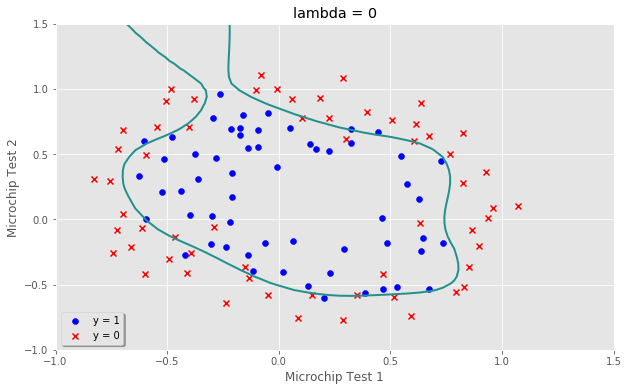

In [40]:
lambd = 0
options = {'maxiter': 100, 'disp': True}
theta, cost  = train(X, y, initial_theta, options, lambd)

fig, ax = plt.subplots(figsize=(10,6))
# plt.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc=3, frameon=True, shadow=True)
plot_decision_boundary(theta, X, y, ax, label=['y = 1', 'y = 0', 'Decision Boundary'])
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.set_title('lambda = ' + str(lambd))
ax.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc=3, frameon=True, shadow=True)

p = predict(theta, X)
print(f'Train Accuracy: {np.mean(np.double(p == y)) * 100:.1f}')

# UNDERFITTING

Train Accuracy: 61.0


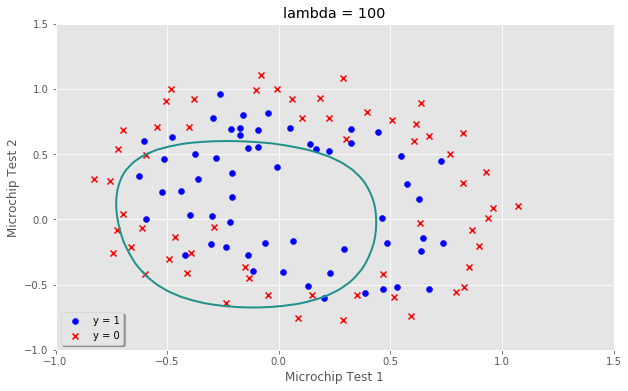

In [41]:
lambd = 100
options = {'maxiter': 100, 'disp': True}
theta, cost  = train(X, y, initial_theta, options, lambd)

fig, ax = plt.subplots(figsize=(10,6))
# plt.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc=3, frameon=True, shadow=True)
plot_decision_boundary(theta, X, y, ax, label=['y = 1', 'y = 0', 'Decision Boundary'])
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.set_title('lambda = ' + str(lambd))
ax.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc=3, frameon=True, shadow=True)

p = predict(theta, X)
print(f'Train Accuracy: {np.mean(np.double(p == y)) * 100:.1f}')